<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/tf_keras_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [27]:
tf.__version__

'2.4.1'

In [28]:
# Define Parameters
num_classes = 10
img_size = 28

### Prepare Data

In [29]:
# Load Data from Dataset function
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Data shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

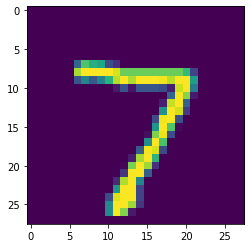

In [30]:
# Show image method 1
plt.imshow(x_test[0])

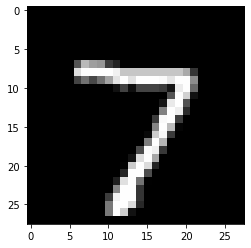

In [31]:
# Show image method 2
plt.imshow(x_test[0], cmap=plt.cm.gray)

In [32]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# normalization to 0 ~ 1
x_train = x_train / 255.
x_test = x_test / 255.

# one hot encoding
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [33]:
img = x_train[0]
print(img, img.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [34]:
# Model method 1
inputs = layers.Input(shape=(img_size*img_size,))
x = layers.Dense(units=128, activation='relu')(inputs)
x = layers.Dense(128, activation=activations.relu)(x)
prediction = layers.Dense(num_classes, activation='softmax')(x)
model = models.Model(inputs=inputs, outputs=prediction)

In [35]:
# 2
model2 = models.Sequential()
model2.add(layers.Dense(units=128, activation='relu', input_shape=(img_size*img_size,)))
model2.add(layers.Dense(units=128))
model2.add(layers.Activation('relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [39]:
logs = model.fit(x_train, y_train,
                batch_size=128,
                epochs=10,
                verbose=1,
                validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5925 - accuracy: 0.8355 - val_loss: 0.1472 - val_accuracy: 0.9560
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1385 - accuracy: 0.9590 - val_loss: 0.1056 - val_accuracy: 0.9671
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0868 - accuracy: 0.9750 - val_loss: 0.0879 - val_accuracy: 0.9728
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9807 - val_loss: 0.0783 - val_accuracy: 0.9749
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9863 - val_loss: 0.0727 - val_accuracy: 0.9765
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0747 - val_accuracy: 0.9778
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0780 - val_accuracy: 0.9752
Epoch 

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')
score

test loss: 0.08206170797348022, test acc: 0.9765999913215637


[0.08206170797348022, 0.9765999913215637]

In [41]:
prediction = model.predict(x_test[:1])
print('model prediction: ', prediction)
print('max probabolity index: ', np.argmax(prediction))

model prediction:  [[7.4340423e-09 8.7252801e-08 1.4117904e-07 1.0957296e-04 8.2563600e-12
  1.4304190e-10 3.1783143e-14 9.9988687e-01 8.0636568e-08 3.2627322e-06]]
max probabolity index:  7


In [42]:
history = logs.history
history

{'accuracy': [0.9099666476249695,
  0.9628499746322632,
  0.9745166897773743,
  0.9801333546638489,
  0.9852666854858398,
  0.9884499907493591,
  0.9897500276565552,
  0.9925666451454163,
  0.9925666451454163,
  0.9942166805267334],
 'loss': [0.3207698464393616,
  0.12540782988071442,
  0.08441156893968582,
  0.06472877413034439,
  0.048757825046777725,
  0.0383419506251812,
  0.032218191772699356,
  0.024727795273065567,
  0.02293531969189644,
  0.0178554467856884],
 'val_accuracy': [0.9559999704360962,
  0.9671000242233276,
  0.9728000164031982,
  0.9749000072479248,
  0.9764999747276306,
  0.9778000116348267,
  0.9751999974250793,
  0.9805999994277954,
  0.9750000238418579,
  0.9765999913215637],
 'val_loss': [0.14716242253780365,
  0.10563995689153671,
  0.08792465925216675,
  0.07829111069440842,
  0.07273522764444351,
  0.07474861294031143,
  0.07803583145141602,
  0.06594356894493103,
  0.09065622091293335,
  0.08206172287464142]}

Text(0.5, 1.0, 'accuracy')

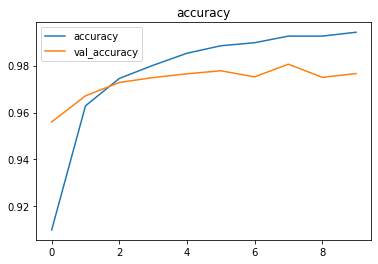

In [43]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

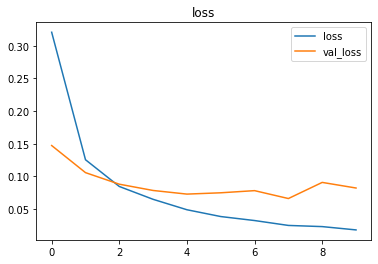

In [44]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1) # Ground Truth
y_pred = np.argmax(model.predict(x_test), axis=-1) # Model prediction
print(y_true.shape, y_pred.shape)


(10000,) (10000,)


In [46]:
# Classification Report
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
label_names = [str(i) for i in range(10)] # ['0' ~  '9']
print(classification_report(y_true, y_pred, target_names=target_names))

NameError: ignored

In [ ]:
# Confusion Matrix: 
# Row: Truth
# Column: Prediction
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print(confusion_matrix(y_true, y_pred))

In [ ]:
prediction = model.predict(x_test[:1])
print('predictions BEFORE saving model: ', prediction)

model.save('my_model.h5')
del model

model = models.load_model('my_model.h5')
prediction = model.predict(x_test[:1])
print('prediction AFTER reloading model', prediction)

In [ ]:
# save and load weights only
model.save_weights('my_model_weights.h5')

# Rebuild model before load weights !
model.load_weights('my_model_weights.h5')